<a href="https://colab.research.google.com/github/vikash524/google-colab-ann-imple-/blob/main/6_Implementation_of_ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of ANN using Keras:

In [ ]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
import tensorflow as tf
import keras

# Checking versions of TensorFlow and Keras
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")



TensorFlow Version: 2.15.0
Keras Version: 2.15.0


# GPU / CPU Check

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data and i am vikash chauhan



In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
len(X_test[1][0])

28

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [ ]:
len(X_train_full[5000:] )

55000

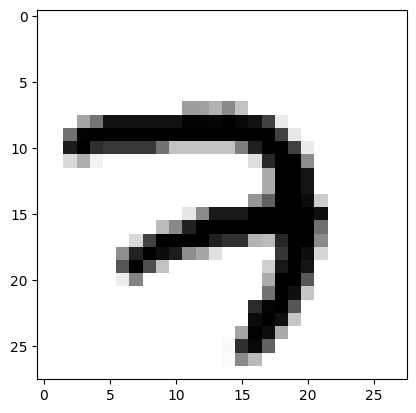

In [ ]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

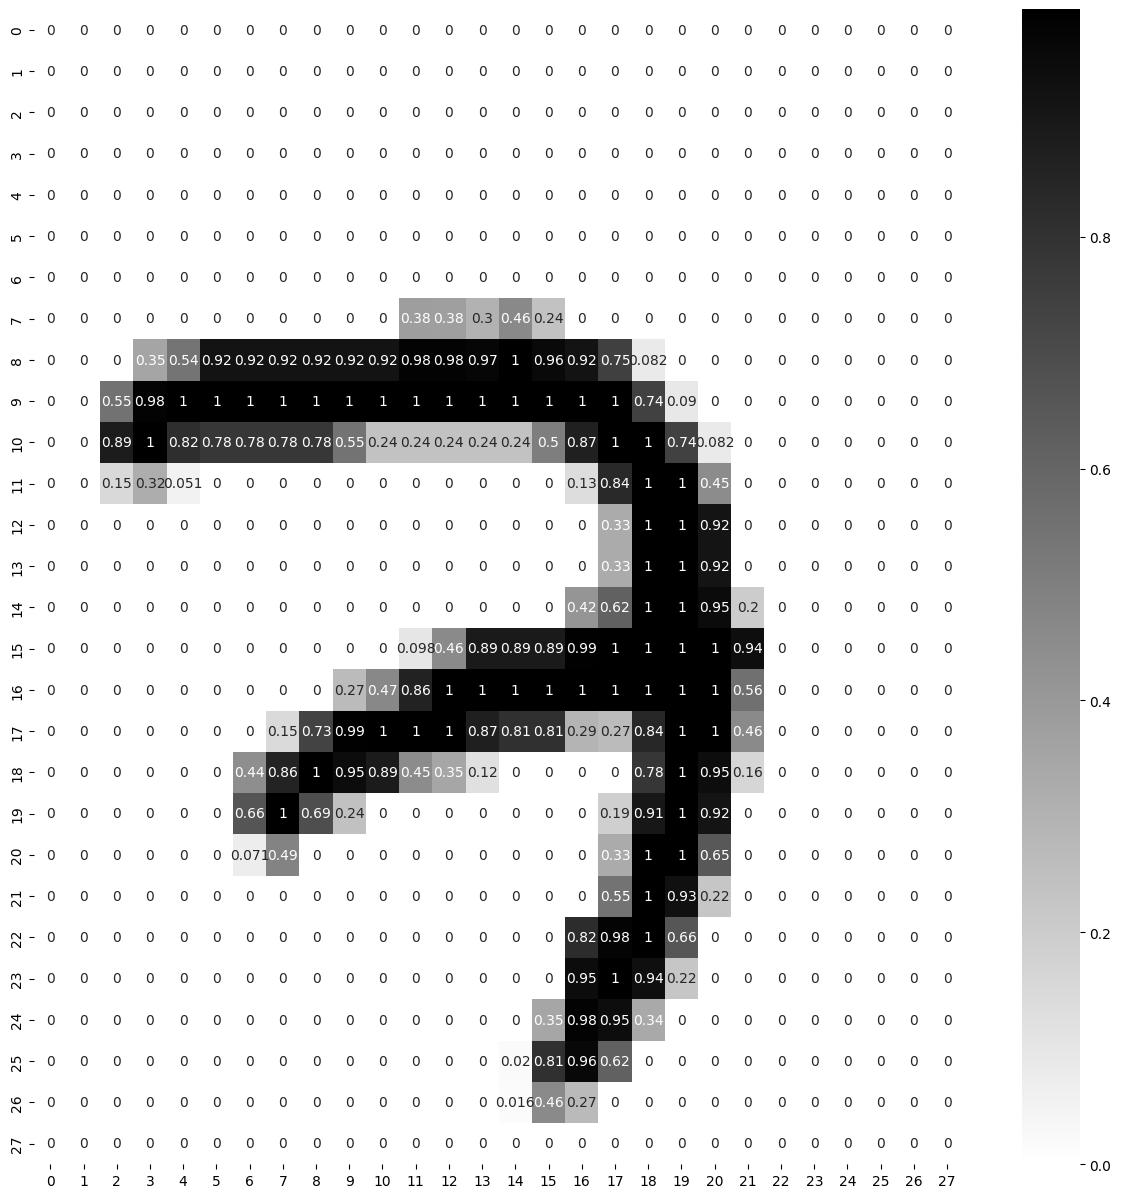

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# our inputs are 28*28 and our output is range from 0 to 9 and we will use softmax fun at last as it give probability of happening events


In [ ]:
X_train[0][23]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.94901961, 0.99607843, 0.9372549 , 0.22352941,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

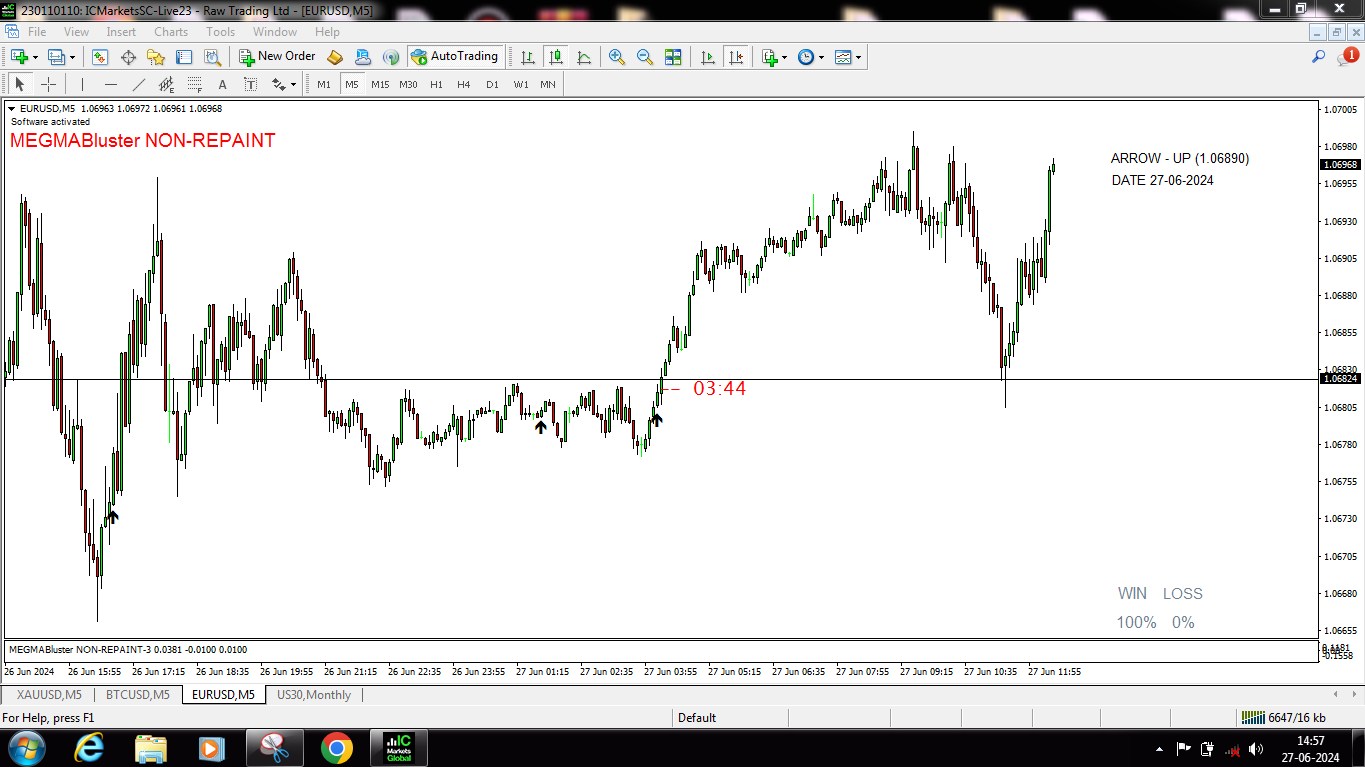# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

In [ ]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[0]
hidden1.name

'inputLayer'

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()

[array([[-0.02663828,  0.07107049, -0.01891033, ...,  0.02723406,
          0.02832157, -0.04144054],
        [-0.02858466,  0.00603294, -0.00514153, ...,  0.06881931,
         -0.03900499, -0.03042269],
        [ 0.01409131,  0.04865757, -0.04273523, ...,  0.01410216,
          0.03131625,  0.06467231],
        ...,
        [-0.00263638, -0.01149457, -0.0256303 , ...,  0.06924343,
         -0.05202947,  0.02758596],
        [ 0.00507069, -0.01671977, -0.00610549, ...,  0.05541946,
         -0.05686426, -0.03960084],
        [ 0.06648846,  0.06524129, -0.04609422, ...,  0.06951253,
          0.06816879,  0.00361063]], dtype=float32),
 array([ 0.00237066,  0.02262422,  0.03567175,  0.01891438,  0.02168492,
         0.02849079,  0.00914392,  0.02274464, -0.00590896, -0.0029294 ,
        -0.00013321,  0.01795201,  0.02148056, -0.03089263,  0.01577183,
         0.00198029, -0.02273858,  0.01185188,  0.00669327,  0.0246974 ,
         0.00321421, -0.00188675,  0.0154571 ,  0.00413136,  0.002

In [ ]:
hidden1.get_weights()[0]#weights=784

array([[-0.02663828,  0.07107049, -0.01891033, ...,  0.02723406,
         0.02832157, -0.04144054],
       [-0.02858466,  0.00603294, -0.00514153, ...,  0.06881931,
        -0.03900499, -0.03042269],
       [ 0.01409131,  0.04865757, -0.04273523, ...,  0.01410216,
         0.03131625,  0.06467231],
       ...,
       [-0.00263638, -0.01149457, -0.0256303 , ...,  0.06924343,
        -0.05202947,  0.02758596],
       [ 0.00507069, -0.01671977, -0.00610549, ...,  0.05541946,
        -0.05686426, -0.03960084],
       [ 0.06648846,  0.06524129, -0.04609422, ...,  0.06951253,
         0.06816879,  0.00361063]], dtype=float32)

In [ ]:
len(hidden1.get_weights()[0])

784

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1]#baise=300

array([ 0.00237066,  0.02262422,  0.03567175,  0.01891438,  0.02168492,
        0.02849079,  0.00914392,  0.02274464, -0.00590896, -0.0029294 ,
       -0.00013321,  0.01795201,  0.02148056, -0.03089263,  0.01577183,
        0.00198029, -0.02273858,  0.01185188,  0.00669327,  0.0246974 ,
        0.00321421, -0.00188675,  0.0154571 ,  0.00413136,  0.00236134,
        0.02220459,  0.01813869,  0.00020739,  0.03224166,  0.01717251,
        0.02870602,  0.03758369,  0.01674864,  0.01622414, -0.00219259,
        0.0300457 ,  0.03780142,  0.00050459,  0.0048303 ,  0.01384259,
       -0.01336728, -0.0054262 ,  0.00125183,  0.00329131, -0.00529838,
        0.00224751,  0.00336382,  0.02397242,  0.01358773,  0.00165341,
        0.01668446, -0.00447033,  0.00386137,  0.0154484 ,  0.0058704 ,
        0.02841578,  0.01417753,  0.00307386,  0.02662617,  0.0113626 ,
        0.01229023, -0.00276698,  0.00749965,  0.00069758,  0.01314098,
        0.02207742, -0.00709739,  0.01552684,  0.02967932,  0.00

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

In [ ]:
hidden1.get_weights()

[array([[-0.02663828,  0.07107049, -0.01891033, ...,  0.02723406,
          0.02832157, -0.04144054],
        [-0.02858466,  0.00603294, -0.00514153, ...,  0.06881931,
         -0.03900499, -0.03042269],
        [ 0.01409131,  0.04865757, -0.04273523, ...,  0.01410216,
          0.03131625,  0.06467231],
        ...,
        [-0.00263638, -0.01149457, -0.0256303 , ...,  0.06924343,
         -0.05202947,  0.02758596],
        [ 0.00507069, -0.01671977, -0.00610549, ...,  0.05541946,
         -0.05686426, -0.03960084],
        [ 0.06648846,  0.06524129, -0.04609422, ...,  0.06951253,
          0.06816879,  0.00361063]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.02663828,  0.07107049, -0.01891033, ...,  0.02723406,
         0.02832157, -0.04144054],
       [-0.02858466,  0.00603294, -0.00514153, ...,  0.06881931,
        -0.03900499, -0.03042269],
       [ 0.01409131,  0.04865757, -0.04273523, ...,  0.01410216,
         0.03131625,  0.06467231],
       ...,
       [-0.00263638, -0.01149457, -0.0256303 , ...,  0.06924343,
        -0.05202947,  0.02758596],
       [ 0.00507069, -0.01671977, -0.00610549, ...,  0.05541946,
        -0.05686426, -0.03960084],
       [ 0.06648846,  0.06524129, -0.04609422, ...,  0.06951253,
         0.06816879,  0.00361063]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)

shape
 (300,)


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)#gradient descent
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1958 - accuracy: 0.9443 - val_loss: 0.1752 - val_accuracy: 0.9528
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1714 - accuracy: 0.9517 - val_loss: 0.1583 - val_accuracy: 0.9592
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1524 - accuracy: 0.9575 - val_loss: 0.1423 - val_accuracy: 0.9624
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1367 - accuracy: 0.9611 - val_loss: 0.1327 - val_accuracy: 0.9652
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1236 - accuracy: 0.9654 - val_loss: 0.1237 - val_accuracy: 0.9650
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1130 - accuracy: 0.9685 - val_loss: 0.1162 - val_accuracy: 0.9684
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1038 - accuracy: 0.9714 - val_loss: 0.1078 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.195755,0.944309,0.175244,0.9528
1,0.171389,0.951691,0.158349,0.9592
2,0.152387,0.957455,0.142308,0.9624
3,0.136677,0.961109,0.132733,0.9652
4,0.123610,0.965400,0.123668,0.9650
5,0.113027,0.968473,0.116207,0.9684
6,0.103798,0.971436,0.107752,0.9712
7,0.095394,0.973600,0.105112,0.9698
8,0.088198,0.975782,0.099511,0.9708
9,0.081830,0.977291,0.095528,0.9726


<Axes: >

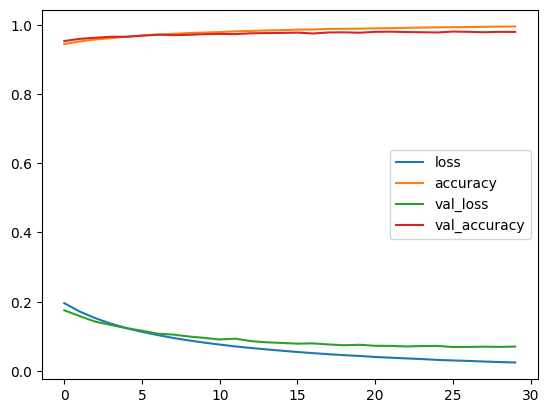

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9781


[0.07166721671819687, 0.9781000018119812]

In [ ]:
x_new = X_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

sample chck for tst dta


In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)#round off


1/1 [==============================] - 0s 70ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_prob

array([[4.66393772e-07, 1.11043498e-07, 2.09844584e-05, 1.75526380e-04,
        3.24981375e-09, 8.39597590e-07, 1.75809020e-11, 9.99788344e-01,
        1.11200825e-06, 1.25575007e-05],
       [1.24878440e-07, 1.49934553e-04, 9.99843121e-01, 5.56390069e-06,
        1.29027372e-10, 2.38697950e-08, 1.01910723e-06, 1.15530502e-12,
        1.05837415e-07, 1.13755002e-12],
       [1.02223976e-06, 9.98267531e-01, 1.43102443e-04, 2.53236740e-05,
        1.28486907e-04, 1.33910680e-05, 5.25552532e-05, 7.67557882e-04,
        5.97994193e-04, 2.94402662e-06]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

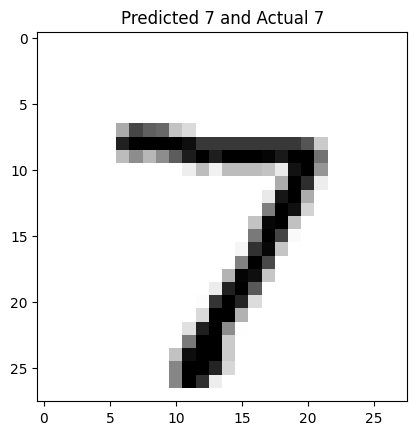

######################


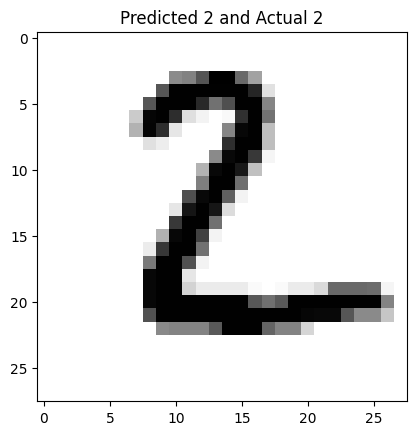

######################


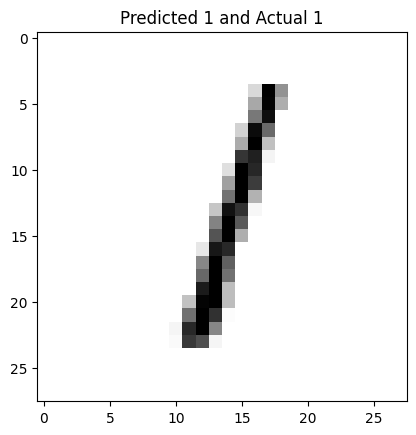

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("on")
  plt.show()
  print("######################")